In [20]:
from sklearn.datasets import load_iris

import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
data = load_iris()

X = data.data
y = data.target

# Target 이름
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

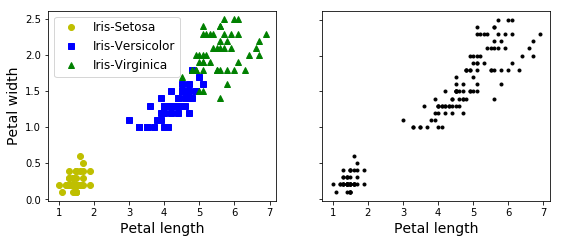

In [22]:
plt.figure(figsize=(9, 3.5))

# 1. 꽃의 종류를 구분해서 보자.
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris-Versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

# 2. 꽃의 종류를 구분하지말고 보자.
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

## Gaussian mixture model

In [23]:
from sklearn.mixture import GaussianMixture
import numpy as np

In [24]:
X.shape

(150, 4)

In [25]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

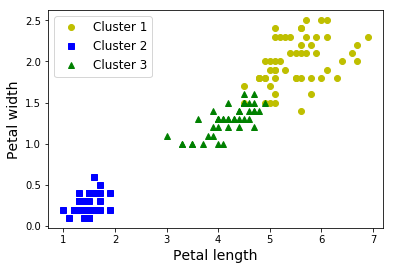

In [26]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)

정확도를 살펴보자. Plot 정보를 살펴보면 알겠지만, 원래 클래스 `2, 0, 1`이 `0, 1, 2`로 바꼈다.

In [27]:
y_pred = [[2, 0, 1][i] for i in y_pred]

In [28]:
np.sum(y_pred==y)

145

In [29]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

# Using Clustering for Preprocessing

## 1. 데이터 셋 로딩

In [30]:
from sklearn.datasets import load_digits

In [31]:
X_digits, y_digits = load_digits(return_X_y=True)

## 2. 학습셋 / 테스트셋 구분

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

## 3. 학습

### (1) 데이터 전처리 없이 학습

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
log_reg.score(X_test, y_test) # 처음 보내??

0.9666666666666667

### (2) K-Means를 이용하여 데이터 전처리 후 학습

In [39]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [40]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [42]:
pipeline.score(X_test, y_test)

0.9822222222222222

Grid search를 이용하여 최상의 $k$를 찾자.

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dua...lty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kmeans__n_clusters': range(2, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
grid_clf.best_params_

{'kmeans__n_clusters': 90}

In [46]:
grid_clf.score(X_test, y_test)

0.9844444444444445

$k=90$일 때, 성능이 근소하게나마 상승했다.

# Clustering for Semi-supervised Learning

다수의 unlabeled instances와 매우 적은 labeled instances를 가지고 있을 때, semi-supervised learning을 clustering을 이용하여 수행할 수 있습니다.

(1) 데이터는 아까의 image 데이터이며, 50개의 instance에 대해서만 label을 가지고 있다고 가정하겠습니다.

In [46]:
n_labeled = 50

In [47]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

In [48]:
k = 50

(2) Unlabeled + labeled data에서 clustering을 수행합니다.

In [71]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
X_digits_dist

array([[31.33905994, 41.96889871, 39.35726202, ..., 52.16098656,
        43.01099731, 47.0563954 ],
       [55.92396284, 43.71133883, 54.31262046, ..., 42.91000488,
        43.32075513, 47.61348001],
       [42.70646977, 41.11611364, 18.08113402, ..., 46.43384382,
        43.07657195, 51.59794401],
       ...,
       [52.03749979, 35.45795409, 47.95964353, ..., 39.43266647,
        43.96234554, 36.1470427 ],
       [31.697396  , 34.37452504, 41.17381404, ..., 44.60183936,
        39.03981532, 36.47989321],
       [43.72529456, 43.97780117, 47.90725608, ..., 53.60184146,
        18.23619458, 26.30919826]])

(3) 각 cluster의 centroid에 대하여 가장 가까운 images를 찾습니다.

In [59]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
representative_digit_idx

array([ 911,  559,   23,  159,  736, 1056,  776,  795,  753,  598,  737,
        683, 1194,  602,  817, 1284,   73,  702,   94,  891,  805, 1071,
       1314, 1022, 1050,  525,  588,  481, 1005,  766,  848,  731,  749,
       1322, 1336,  705, 1151,  494,  357,  459,  843,  850,  151,  256,
        576,  460,  596,  648,  841,  214], dtype=int64)

In [65]:
X_representative_digits = X_train[representative_digit_idx]
# 각 centroid와 가장 가깝기 때문에, 각 cluster를 대표하는 image입니다.
X_representative_digits

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ..., 14.,  2.,  0.],
       [ 0.,  0.,  4., ...,  6.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  1.,  0.],
       [ 0.,  0.,  6., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  9.,  0.,  0.]])

(4) 해당 images에 대하여 직접 라벨링을 합니다.

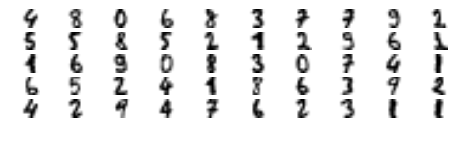

In [72]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [73]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

(5) 해당 이미지를 이용하여 학습을 합니다.

In [74]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9244444444444444

(6) 만약에, 50개의 데이터를 이용하여, 같은 클러스터에 속하는 데이터에 라벨을 할당하면?

In [75]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [76]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
log_reg.score(X_test, y_test)

0.9288888888888889

Outlier에 취약하다. 따라서 성능의 큰 발전이 있지는 않다.

(7) 만약에 같은 클러스터에 속하는 데이터 전체에 라벨을 할당하는 것이 아니라, centroid에 가까운 데이터에 대해서만 라벨을 할당하면?

In [78]:
# 각 instance에서 가장 가까운 클러스터까지의 거리를 가지고 옵니다.
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

print(X_cluster_dist.shape)
X_cluster_dist

(1347,)


array([30.3917992 , 20.3734662 , 15.08582969, ..., 19.36276495,
       19.5626378 , 18.23619458])

In [79]:
percentile_closest = 20

for i in range(k):
    # 클러스터에 해당하는 데이터만 불러옵니다.
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    # cluster내에서 상위 20퍼센트에 해당하는 거리(cutoff_distance) 찾습니다.
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    # 임계치보다 큰 거리는 -1로 바꿉니다.
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [75]:
partially_propagated = (X_cluster_dist != -1)
# X_train은 이전 예제에서 클러스터에 할당된 데이터들에 대해 클러스터가 부여되었습니다. 그 중에서 상위 20%만 선택합니다.
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [76]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
log_reg.score(X_test, y_test)

0.9422222222222222

상위 20%에 할당된 라벨의 accuracy는 상당히 높다.

In [78]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846